# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import seaborn as sns
from scipy import stats

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
## CHECKING DF & COLUMN NAMES

print(customers.head()) 


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [4]:
## CHECKING VALUE TYPES DF

print(customers.dtypes)


Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [5]:
## CHECKING DF SHAPE

print("shape : " + str(customers.shape))


shape : (440, 8)


In [6]:
## CHECKING FOR UNIQUE VALUES IN COLUMNS

print("Unique values for Region: " + str(customers.Region.unique()))
print("Unique values for Channel: " + str(customers.Channel.unique()))


Unique values for Region: [3 1 2]
Unique values for Channel: [2 1]


In [7]:
## CHECKING NUM OF NULL VALUES PER COLUMN

print("Checking Null values by Column : " + str(customers.isna().sum()))


Checking Null values by Column : Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [8]:
## MORE IN-DEPTH DESCRIPTION OF DF VALUES

print(customers.describe())


          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [55]:
def mode_and_median(column_name):
    median = customers."{}".median().format(column_name)
    mode = customers."{}".mode().format(column_name)
    return("The mode and median for column {} is : " + str (median) + str (max(mode))).format(column_name)

mode_and_median(Fresh)


SyntaxError: invalid syntax (<ipython-input-55-360590399451>, line 2)

In [9]:
## FINDING MEDIAN AND MODE FOR ALL COLUMNS

print("Fresh median: " + str (customers.Fresh.median()))
print("Milk median: " + str (customers.Milk.median()))
print("Grocery median: " + str (customers.Grocery.median()))
print("Frozen median: " + str (customers.Frozen.median()))
print("Detergents_Paper median: " + str (customers.Detergents_Paper.median()))
print("Delicassen median: " + str (customers.Delicassen.median()))
print("Channel median: " + str (customers.Channel.median()))
print("Region median: " + str (customers.Region.median()))

print("Fresh mode: " + str (max(customers.Fresh.mode())))
print("Milk mode: " + str (max(customers.Milk.mode())))
print("Grocery mode: " + str (max(customers.Grocery.mode())))
print("Frozen mode: " + str (max(customers.Frozen.mode())))
print("Detergents_Paper mode: " + str (max(customers.Detergents_Paper.mode())))
print("Delicassen mode: " + str (max(customers.Delicassen.mode())))
print("Channel mode: " + str (max(customers.Channel.mode())))
print("Region mode: " + str (max(customers.Region.mode())))

Fresh median: 8504.0
Milk median: 3627.0
Grocery median: 4755.5
Frozen median: 1526.0
Detergents_Paper median: 816.5
Delicassen median: 965.5
Channel median: 1.0
Region median: 3.0
Fresh mode: 18044
Milk mode: 5139
Grocery mode: 10391
Frozen mode: 4324
Detergents_Paper mode: 955
Delicassen mode: 834
Channel mode: 1
Region mode: 3


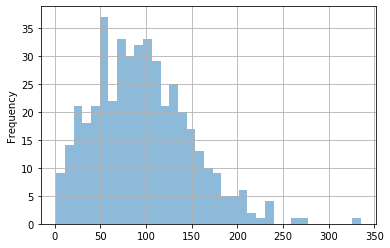

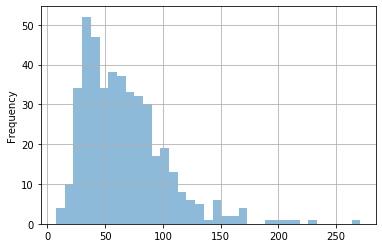

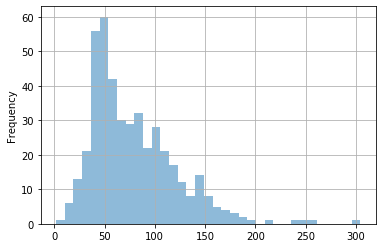

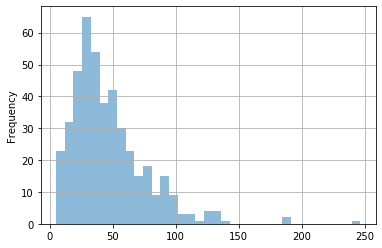

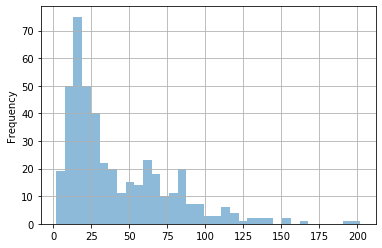

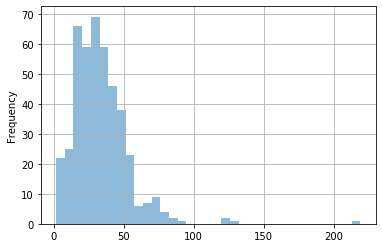

In [113]:
## FUNCTION FOR PLOTTING HISTOGRAMS

def plot_hist(df):
    df = df.drop(columns = ["Channel", "Region"])
    for col in df.columns:
        _arr = np.array(customers[col])
        _df = pd.DataFrame(_arr)
        _df_pow = _df.apply(np.sqrt)
        plot = _df_pow.plot.hist(alpha=0.5, bins=35, grid=True, legend=None);
        #plt.title(customers[col]) # NAME ALL HISTOGRAMS WITH COL NAME
    return plot

plot_hist(customers)

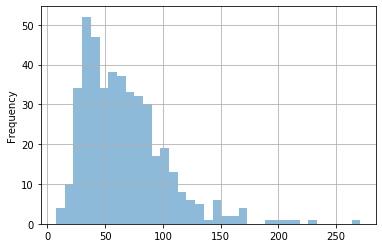

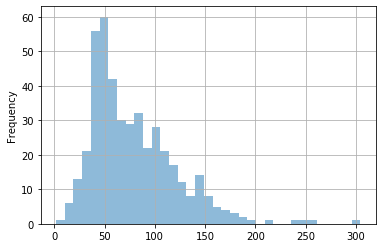

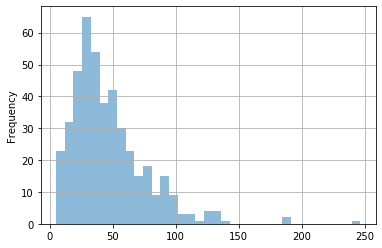

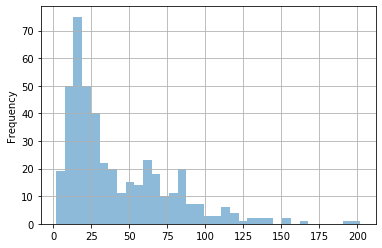

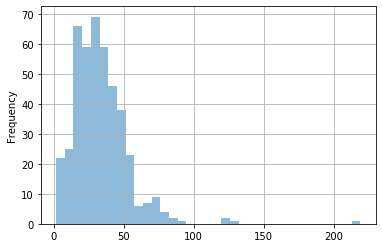

In [67]:
fresh_arr = np.array(customers['Fresh'])
fresh_df = pd.DataFrame(fresh_arr)
fresh_df_pow = fresh_df.apply(np.sqrt) # Fit a normal distribution to the data
#param = stats.norm.fit(fresh_df_pow)
#x = np.linspace(0, 20, 100)
#pdf_fitted = stats.norm.pdf(x, *param)
#fresh_df_pow.plot.hist(alpha=0.5, bins=35, grid=True, legend=None)
#plt.plot(x, pdf_fitted, color='r')

milk_arr = np.array(customers['Milk'])
milk_df = pd.DataFrame(milk_arr)
milk_df_pow = milk_df.apply(np.sqrt)
milk_df_pow.plot.hist(alpha=0.5, bins=35, grid=True, legend=None)


grocery_arr = np.array(customers['Grocery'])
grocery_df = pd.DataFrame(grocery_arr)
grocery_df_pow = grocery_df.apply(np.sqrt)
grocery_df_pow.plot.hist(alpha=0.5, bins=35, grid=True, legend=None)


frozen_arr = np.array(customers['Frozen'])
frozen_df = pd.DataFrame(frozen_arr)
frozen_df_pow = frozen_df.apply(np.sqrt)
frozen_df_pow.plot.hist(alpha=0.5, bins=35, grid=True, legend=None)


detergentsPaper_arr = np.array(customers['Detergents_Paper'])
detergentsPaper_df = pd.DataFrame(detergentsPaper_arr)
detergentsPaper_df_pow = detergentsPaper_df.apply(np.sqrt)
detergentsPaper_df_pow.plot.hist(alpha=0.5, bins=35, grid=True, legend=None)


delicassen_arr = np.array(customers['Delicassen'])
delicassen_df = pd.DataFrame(delicassen_arr)
delicassen_df_pow = delicassen_df.apply(np.sqrt)
delicassen_df_pow.plot.hist(alpha=0.5, bins=35, grid=True, legend=None)


#channel_arr = np.array(customers['Channel'])   # Not enough values 
#channel_df = pd.DataFrame(channel_arr)   
#channel_df.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)   

#region_arr = np.array(customers['Region'])   # Not enough values
#region_df = pd.DataFrame(region_arr)
#region_df.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)


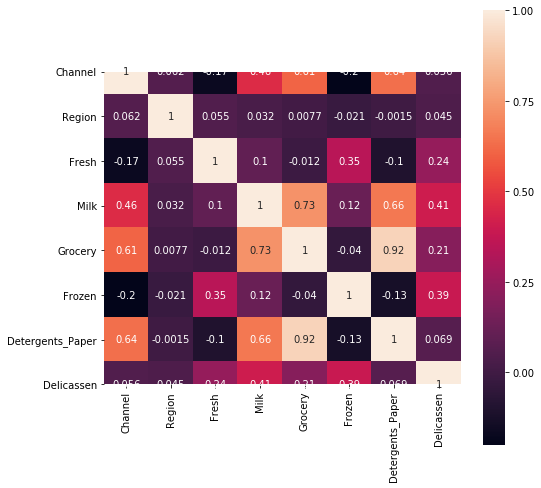

In [11]:
## CHECKING CORRELATION BETWEEN COLUMNS
correlation_matrix = customers.corr()
fig, ax = plt.subplots(figsize=(8,8))
corr_heat_map = sns.heatmap(correlation_matrix, annot = True, square= True, ax=ax)
corr_heat_map;


In [12]:
## MY OBSERVATIONS

## What does each column mean?
# DESCRIPTION OF COLUMNS

"""
FRESH: annual spending (m.u.) on fresh products (Continuous);
MILK: annual spending (m.u.) on milk products (Continuous);
GROCERY: annual spending (m.u.) on grocery products (Continuous);
FROZEN: annual spending (m.u.) on frozen products (Continuous)
DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous);
CHANNEL: customer Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
REGION: customers Region: Lisbon, Oporto or Other (Nominal)

(Minimum, Maximum, Mean, Std. Deviation)
FRESH (3, 112151, 12000.30, 12647.329)
MILK (55, 73498, 5796.27, 7380.377)
GROCERY (3, 92780, 7951.28, 9503.163)
FROZEN (25, 60869, 3071.93, 4854.673)
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
DELICATESSEN (3, 47943, 1524.87, 2820.106)

REGION Frequency
Lisbon 77
Oporto 47
Other Region 316
Total 440

CHANNEL Frequency
Horeca 298
Retail 142
Total 440
"""

## Any categorical data to convert?
# NO

## Descriptive statistics - any outliers to remove?
# THERE ARE OUTLIERS TO REMOVE

## Any missing data to remove?
# NO

## Column collinearity - any high correlations?
# Milk and Grocery - High 0.73
# Milk and Detergents_Paper - High 0.66
# Grocery and Channel - High 0.61
# Detergents_Paper and Channel - High 0.64

## Column-wise data distribution - is the distribution skewed?
# THE DISTRIBUTION IS VERY SKEWED IN ALL COLUMNS

## ETC
# VALUE RANGES IN COLUMNS DIFFER GREATLY. STANDARIZATION NECESSARY


'\nFRESH: annual spending (m.u.) on fresh products (Continuous);\nMILK: annual spending (m.u.) on milk products (Continuous);\nGROCERY: annual spending (m.u.) on grocery products (Continuous);\nFROZEN: annual spending (m.u.) on frozen products (Continuous)\nDETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)\nDELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous);\nCHANNEL: customer Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)\nREGION: customers Region: Lisbon, Oporto or Other (Nominal)\n\n(Minimum, Maximum, Mean, Std. Deviation)\nFRESH (3, 112151, 12000.30, 12647.329)\nMILK (55, 73498, 5796.27, 7380.377)\nGROCERY (3, 92780, 7951.28, 9503.163)\nFROZEN (25, 60869, 3071.93, 4854.673)\nDETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)\nDELICATESSEN (3, 47943, 1524.87, 2820.106)\n\nREGION Frequency\nLisbon 77\nOporto 47\nOther Region 316\nTotal 440\n\nCHANNEL Frequency\nHoreca 298\nRetail 142\nTotal 440\n'

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


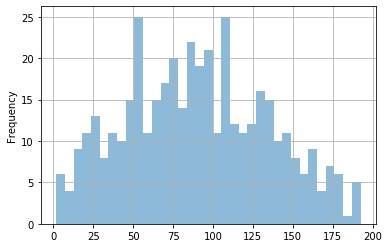

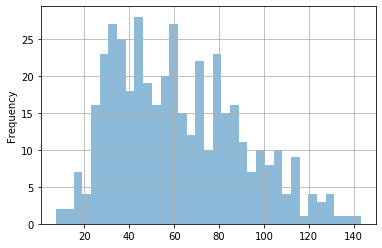

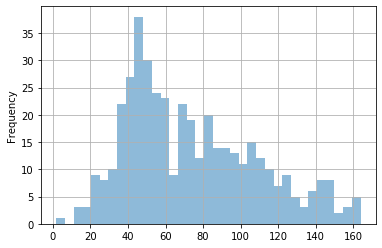

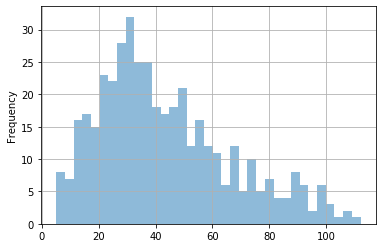

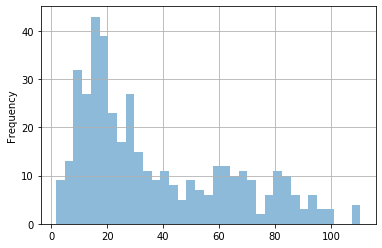

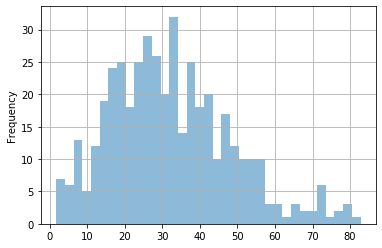

In [107]:
columns_lst = list(customers)
print(columns_lst)

def plot_no_outliers_hist(df):
    df = df.drop(columns = ["Channel", "Region"])
    for col in df.columns:
        mean = np.mean(df[col], axis=0)
        sd = np.std(df[col], axis=0)
        final_list = [x for x in df[col] if (x > mean - 2 * sd)]
        final_list = [x for x in final_list if (x < mean + 2 * sd)]
        df_no_outliers = pd.DataFrame(final_list)
        df_pow= df_no_outliers.apply(np.sqrt)
        plots = df_pow.plot.hist(alpha=0.5, bins=35, grid=True, legend=None);
    return plots
plot_no_outliers_hist(customers)

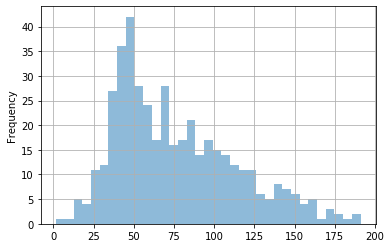

In [21]:
## WE REMOVE OUTLIERS FOR EACH COLUMN

fresh_mean = np.mean(fresh_arr, axis=0)
fresh_sd = np.std(fresh_arr, axis=0)

fresh_final_list = [x for x in customers['Grocery'] if (x > mean - 2 * fresh_sd)]
fresh_final_list = [x for x in fresh_final_list if (x < mean + 2 * fresh_sd)]

fresh_df_2 = pd.DataFrame(fresh_final_list)
fresh_df_pow= fresh_df_2.apply(np.sqrt)
fresh_df_pow.plot.hist(alpha=0.5, bins=35, grid=True, legend=None);


In [ ]:
# Your comment here



# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [ ]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [ ]:
# Your code here:


Count the values in `labels`.

In [ ]:
# Your code here:


# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
# Your code here


Count the values in `labels_DBSCAN`.

In [ ]:
# Your code here


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here

In [ ]:
################################# DISCARDED WORK ##########################################

In [ ]:
## FINDING SKEWNESS AND KURTOSIS FOR EACH COLUMN


#freshToList = customers['Fresh'].tolist()
#print("Fresh Skewness: " + str(skew(freshToList)))
#print("Fresh Kurtosis: " + str(kurtosis(freshToList)))

#milkToList = customers['Milk'].tolist()
#print("Milk Skewness: " + str(skew(milkToList)))
#print("Milk Kurtosis: " + str(kurtosis(milkToList)))

#groceryToList = customers['Grocery'].tolist()
#print("Grocery Skewness: " + str(skew(groceryToList)))
#print("Grocery Kurtosis: " + str(kurtosis(groceryToList)))

#frozenToList = customers['Frozen'].tolist()
#print("Frozen Skewness: " + str(skew(frozenToList)))
#print("Frozen Kurtosis: " + str(kurtosis(frozenToList)))

#detergentsPaperToList = customers['Detergents_Paper'].tolist()
#print("DetergentsPaper Skewness: " + str(skew(detergentsPaperToList)))
#print("DetergentsPaper Kurtosis: " + str(kurtosis(detergentsPaperToList)))

#delicassenToList = customers['Delicassen'].tolist()
#print("Delicassen Skewness: " + str(skew(delicassenToList)))
#print("Delicassen Kurtosis: " + str(kurtosis(delicassenToList)))

#channelToList = customers['Channel'].tolist()
#print("Channel Skewness: " + str(skew(channelToList)))
#print("Channel Kurtosis: " + str(kurtosis(channelToList)))

#regionToList = customers['Region'].tolist()
#print("Region Skewness: " + str(skew(regionToList)))
#print("Region Kurtosis: " + str(kurtosis(regionToList)))

####### PLOT HISTOGRAMS FOR EACH #########